# Parcial 3 
# Señales y Sistemas 2023-I
# Edward Fabian Goyeneche Velandia. - 1007540013
# Juan Esteban Guevara Roncancio. -  1002655776


---




**1.** **Encuentre la funcion de transferencia que caracteriza el sistema masa, resorte, amortiguador.(asuma condiciones iniciales cero).**

**Posteriormente, encuentre el sistema equivalente del modelomasa, resorte, amortiguador, a partir del siguiente circuito electrico Finalmente, proponga unos valores de m, k y c y sus equivalentes R, L y C, para simular un sistema subamortiguado.**

**Presente las simulaciones y graficas de polos y ceros, diagrama de Bode, respuesta impulso y respuesta al escalon. Determine los valores del factor de amortiguamiento, frecuencia
natural, frecuencia natural amortiguada, maximo sobreimpulso, tiempo pico y tiempo de establecimiento**

Archivo solucion examen: [Examen a mano ( Edward / Juan)](https://drive.google.com/file/d/1JVwYw6qGaCaq1KE_0qGOjTtBWWHBWhD3/view?usp=sharing)

#**SOLUCION:**

* El sistema masa Resorte y amortiguador lo modelamos  de forma de la conservacion de fuerzas

$$F_S + F_F + F_I = F_E$$
Ver  Pagina 1[Examen ](https://drive.google.com/file/d/1JVwYw6qGaCaq1KE_0qGOjTtBWWHBWhD3/view?usp=sharing) 
$$H(S) = \frac{Y(s)}{X(s)}=\frac{1}{ms^2 + cs + k}$$

+ Aplicando transformada de laplace  se llega a la funcion de transferencia.
$$H(S) = \frac{Y(s)}{X(s)}=\frac{1}{ms^2 + cs + k}$$
Ver  Pagina 1[Examen ](https://drive.google.com/file/d/1JVwYw6qGaCaq1KE_0qGOjTtBWWHBWhD3/view?usp=sharing) (Funcion de Tranferencia)

$$\frac{1}{CS}I_1 = I_2(\frac{1}{cs}+ R)\Rightarrow  I_2 =(1+Rcs)I_2$$
+ Para el Circuito electrico (RLC) , se utilizamos el calculo de impedancias transformada
$$\frac{1}{CS}I_1 = I_2(\frac{1}{cs}+ R)\Rightarrow  I_2 =(1+Rcs)I_2$$
Ver  Pagina 2[Examen ](https://drive.google.com/file/d/1JVwYw6qGaCaq1KE_0qGOjTtBWWHBWhD3/view?usp=sharing) (Ley de tensiones i1(En Laplace directamente))

+ Se reemplaza $I_1$ y se obtiene la funcion de transferencia$ 

$$H(S) = \frac{1}{RLCs^2+ LCs + R}=\frac{1}{ms^2 +cs + k}$$



+ De la igualdad:

$$
m = LC = a_2 \\ 
c= \frac{L}{C}= a_1 \\
k = 1 = a_0
$$

Se reemplaza  en la forma  canonica:


$$ξ = \frac{a_1}{2 \sqrt{a_0 a_2}} = \frac{C}{2 \sqrt{k m}}  = \frac{L}{2R \sqrt{LC}}$$

Ver  Pagina 2[Examen ](https://drive.google.com/file/d/1JVwYw6qGaCaq1KE_0qGOjTtBWWHBWhD3/view?usp=sharing)


+ El maximo sobreimpulso estará dado por si es repuesta al impulso o al escalon unitario por lo que  que será indicado en la simulacion.

Polos:
$$P_{1,2}= -\xi ω_n \pm j ω_n \sqrt{1-ξ } = \frac{2}{3}\cdot  \frac{2}{3} \pm Wdj= \frac{-2}{9}  \pm \frac{\sqrt{5}}{9}j $$

Ver  Pagina 3[Examen ](https://drive.google.com/file/d/1JVwYw6qGaCaq1KE_0qGOjTtBWWHBWhD3/view?usp=sharing)

In [ ]:
!pip install sympy --upgrade  #API de control de Sympy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# SIMULACION

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
sym.init_printing()
#Variables Definidas
t, m, c, k = sym.symbols('t m c k', real=True,positive=True)
s = sym.symbols('s', complex=True)

Forma cananica:
$$H(s) = \frac{1}{a_2 s^2 + a_1s + a0}$$

In [ ]:
#Valores de la forma Canonica del Slit
# con los valores encontradaos

m = 9.0  #a2->CL en  el circuito equivalente
c= 4.0   #a1 L/R  en el circuito equivalente
k= 1.0   #ao  1 eb ek circuito equivalente

Ko = 1 / k
wn= sym.sqrt(k/m)
xi = c / (2*sym.sqrt(k*m))

#Funcion de  Transferencia
H= Ko* wn**2/(s**2+2*xi*wn*s+wn**2)
H




             0.111111111111111              
────────────────────────────────────────────
 2                                          
s  + 0.444444444444444⋅s + 0.111111111111111

In [ ]:
#Se calcula los polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
(p1,p2)

(-0.222222222222222 + 0.248451997499977⋅ⅈ, -0.222222222222222 - 0.248451997499
977⋅ⅈ)

In [ ]:
#Utiliza y reemmplaza los valores
mck = {'m': 9.0, 'c': 4.0, 'k': 1.0}
mck

{'m': 9.0, 'c': 4.0, 'k': 1.0}

# POLOS Y CEROS, (Graficas)

In [ ]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -0.222222222222222 + 0.248451997499977*I
p2= -0.222222222222222 - 0.248451997499977*I
xi= 0.666666666666667
omega_n= 0.333333333333333


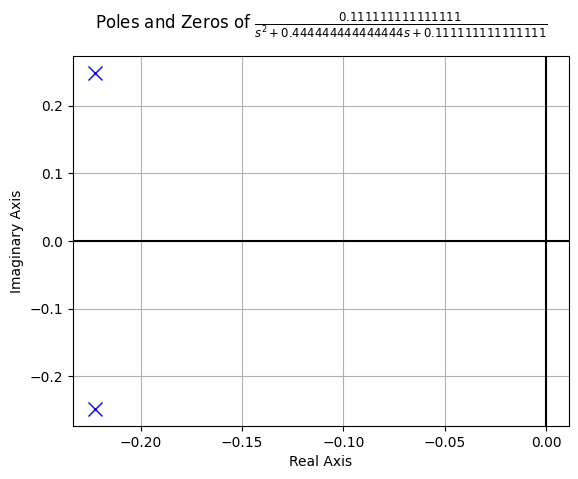

In [ ]:
#Graficar los polos y ceros
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))
TF = TransferFunction(num, den, s)# num y den (funcion de transferencia) RLC
pole_zero_plot(TF)

# Diagrama de Bode Funcion de Tranferencia

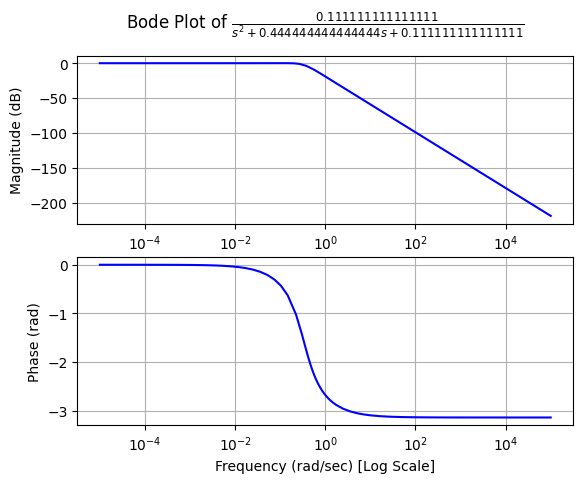

In [ ]:
#Ayudados de APi de sympy para Control
#Diagrama de Bode  Funcion de transferencia RLC
bode_plot(TF)

#Respuesta al Impulso

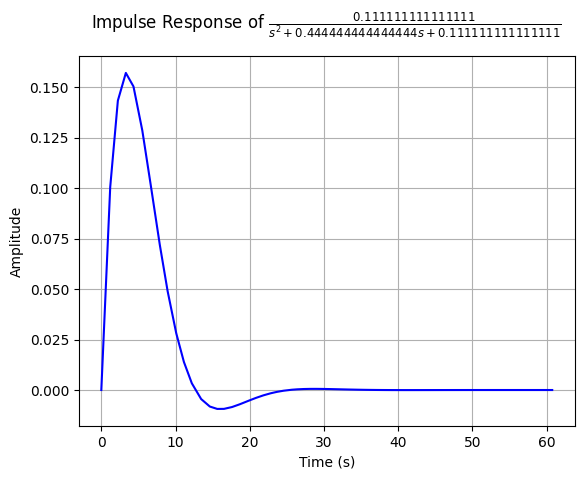

In [ ]:
#Respuesta al impulso
impulse_response_plot(TF,upper_limit=13.5/(xi.subs(mck)*wn.subs(mck))) 
#Se utiliza  el tiempo de establecimiento

# Respuesta Escalon unitario

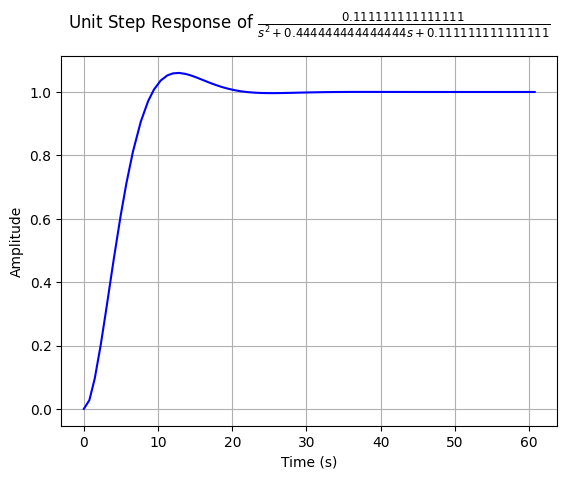

In [ ]:
#Respuesta al Escalon
step_response_plot(TF,upper_limit=13.5/(xi.subs(mck)*wn.subs(mck)))
#Se utiliza  el tiempo de establecimiento



---



**2.** **Sea el demoluador en amplitud.**



**Asumiendo θ0 = 0, presente una simulacion sobre Python
para el proceso de modulacion y demodulacion en amplitud,de 5 segundos de su cancion favorita de Youtube. Especifique adecuadamente las consideraciones de diseno en tiempo y en frecuencia (con las graficas pertinentes), y reproduzca ´
el segmento de la cancion para cada una de las etapas del sistema de demodulacion. Tenga en cuenta el dise no de un filtro digital pasa bajas en la etapa de demodulacion, utilizando Transformada Z. Presente la grafica de polos y ceros y el diagrama de Bode del filtro (se sugiere tener en cuenta
el cuaderno Transformada Z).**

In [ ]:
# Instalación herramienta para descargar música
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz (2.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mutagen-1.46.0-py3-none-any.whl (193 kB)
  Using cached pycryptodomex-3.18.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
  Using cached websockets-11.0.3-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (129 kB)
  Using cached certifi-2023.5.7-py3-none-any.whl (156 kB)
  Using cached Brotli-1.0.9-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.7 MB)
  Created wheel for yt-dlp: filename=yt_dlp-2023.3.4-py2.py3-none-any.whl size=2745032 sha256=9e689af306b906c340146acc6007107c66029daf3b5c944864ca7488cfd

In [ ]:
# Instalación liberría manejo de audio
!pip install soundfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Descarga de la canción a procesar
link="https://music.youtube.com/watch?v=qHfsxYVq1FY&feature=share"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

[youtube] Extracting URL: https://music.youtube.com/watch?v=qHfsxYVq1FY
[youtube] qHfsxYVq1FY: Downloading webpage
[youtube] qHfsxYVq1FY: Downloading android player API JSON
[youtube] qHfsxYVq1FY: Downloading android music player API JSON
[youtube] qHfsxYVq1FY: Downloading web music client config
[youtube] qHfsxYVq1FY: Downloading player bbe1b497
[youtube] qHfsxYVq1FY: Downloading web music player API JSON
[info] qHfsxYVq1FY: Downloading 1 format(s): 251
[download] audio.mp3 has already been downloaded
[ExtractAudio] Not converting audio audio.mp3; file is already in target format mp3


In [ ]:
# Trnasformación de archivo mp3 a wav
!ffmpeg -i audio.mp3 output.wav 

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

Por simplicidad de la visualización de datos se va a trabajar un solo canal, pero en el caso de querer hacerlo con 2, simplemente se repite para ambos canales o se refactorizan las funciones para operar en la matriz entregada por la librería soundfile

In [ ]:
import soundfile as sf # para instalar pip install soundfile 
#lee archivos wav
nombre_out = "output.wav"
x, Fs = sf.read(nombre_out)

# Imprimir la frecuencia de muestreo
print('Frecuencia de muestreo %.2f[Hz]s' % (Fs))
# Se toma el mensaje como una muestra de la canción entre los segundos 45 y 50
m = x[int(45*Fs):int(50*Fs)].copy().T[0]

Frecuencia de muestreo 48000.00[Hz]s


Audio original

In [ ]:
from IPython.display import Audio
Audio(m,rate=Fs)

# Cálculo Frecuencia portadora
*Dado que estamos trabajando en tiempo discreto debemos tener en cuenta el teorema de nyquist:
$$
2F\leq F_s
$$
Que nos indica que cualquier frecuencia que trabajemos deberá ser máximo la mitad de la frecuencia de muestreo, en este caso 48KHz, pero ya que sabemos que después del paso de mixing, obtendremos una señal con el doble de frecuencia de nuestra portadora se debe asegurar que:*
$$
F_c \leq \frac{F_s}{4}
$$
Teniendo en cuenta esta regla, y para no trabajar en el límite de la frecuencia vamos a decir que:
$$
F_c=11 Khz
$$

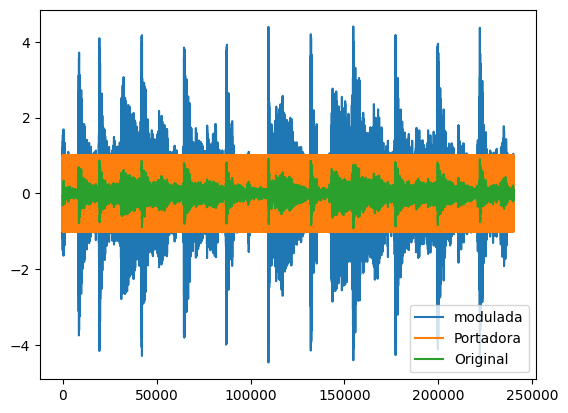

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Fc = 11000  #se especifica la Frecuencia portadora, basado en  Nyquist
A1 = 5
  
def generarPortadora(t,Fc,Fs):
  t = np.arange(0,t,1/Fs) # Vector de tiempo
  portadora = np.sin(2*np.pi*Fc*t) # Señal portadora
  
  return portadora
  
def ModularAM(m,A1,Fc,Fs):
  peak = max(abs(m))
  portadora = generarPortadora(m.size/Fs,Fc,Fs)

  modulada = A1*m*portadora
  
  
  return modulada
  
modulada = ModularAM(m,A1,Fc,Fs)
portadora = generarPortadora(5,Fc,Fs)
plt.plot(modulada,label="modulada")
plt.plot(portadora,label="Portadora")
plt.plot(m,label="Original")
plt.legend()

Audio modulado

In [ ]:
Audio(modulada,rate=Fs)

Se grafican por separado los diferentes espectros para que sea más evidente su estructura.

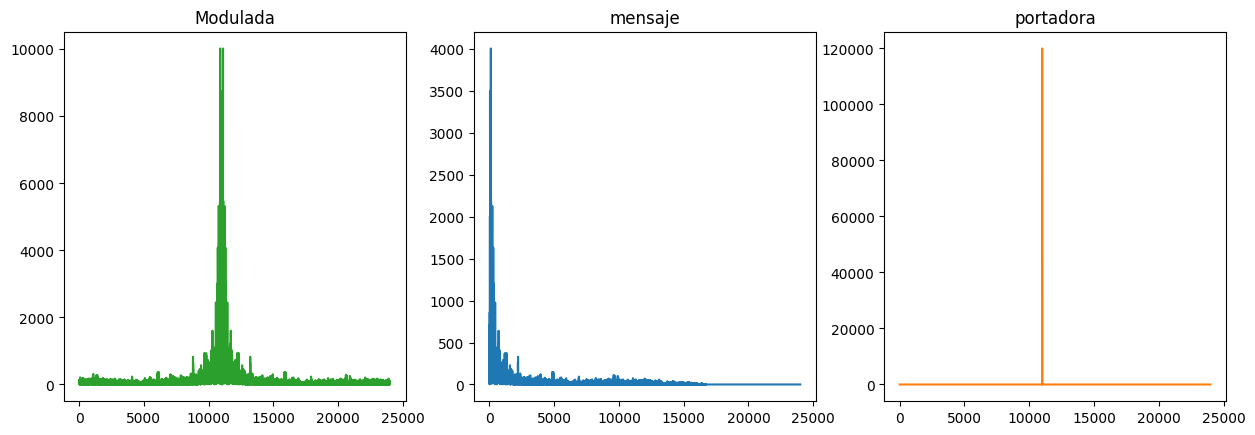

In [ ]:
Xfc = np.fft.rfft(portadora)
Xfm = np.fft.rfft(m)
Xfy = np.fft.rfft(modulada)

vfre = np.fft.rfftfreq(len(portadora),1/Fs) 

fig,axs = plt.subplots(1,3)
fig.set_figwidth(15)

axs[0].plot(vfre,abs(Xfy),'tab:green',label='modulado')
axs[0].set_title("Modulada")
axs[1].plot(vfre,abs(Xfm),label='mensaje')
axs[1].set_title("mensaje")
axs[2].plot(vfre,abs(Xfc),'tab:orange',label='portadora')
axs[2].set_title("portadora")
plt.show()

Se Mezcla la señal nuevamente con la portadora, cómo se hace en el paso de mixing del problema.

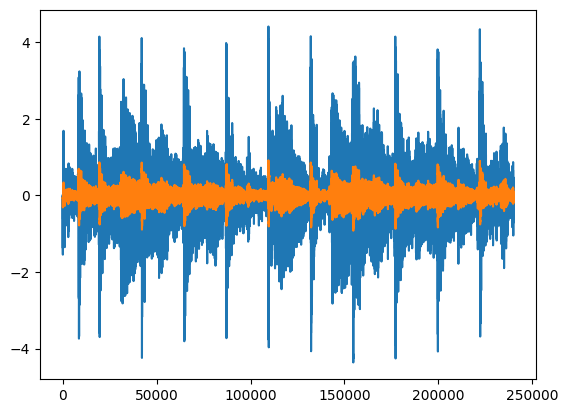

In [ ]:
def Mix(y,Fc,Fs):
  t = np.arange(0,y.size/Fs,1/Fs)
  MixSignal = np.sin(2*np.pi*Fc*t)

  return MixSignal*y
  
Mezclada = Mix(modulada,Fc,Fs)
plt.plot(Mezclada)
plt.plot(m)

Audio mezclado

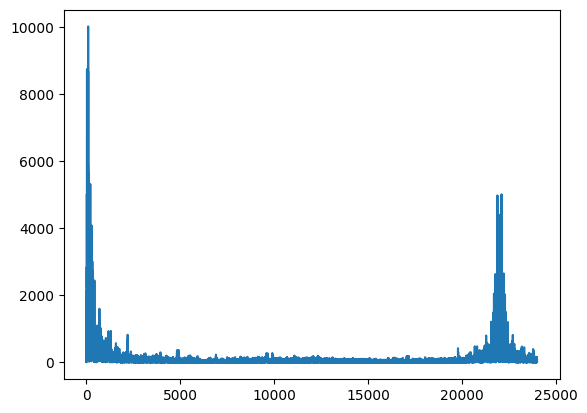

In [ ]:
Xfm = np.fft.rfft(Mezclada)

plt.plot(vfre,abs(Xfm),label='Mezclado')

In [ ]:
Audio(Mezclada,rate=Fs)

Nótese que el audio mezclado aparentemente es el original, esto se debe a que la frecuencia portadora al ser tan alta, y ser duplicada alcanza los 22Khz, una frecuencia inaudible para nosotros, entonces toda la componente $\frac{A_1 m(t)}{2}sen(4\pi F_ct)$ va a ser cómo si no existiera para nosotros, para visualizar los efectos de la frecuencia portadora en la señal mezclada miremos que pasa con una frecuencia portadora más pequeña.

In [ ]:
moduladaFMenor = ModularAM(m,A1,7000,Fs)
mezcladaFMenor = Mix(m,7000,Fs)
Audio(mezcladaFMenor,rate=Fs)

Al manejar una frecuencia portadora de 7Khz, vamos a obtener una componente de 14Khz sumando nuestra señal original, como esa es una frecuencia del espectro audible por el ser humano, al eliminar esta componente con un filtro pasabaja, también estaremos perdiendo mucha información sobre los agudos de nuestra canción, es por eso que en lo posible, lo mejor es trabajar con una frecuencia lo más alta posible, respetando el máximo impuesto al principio de este desarrollo.

Cómo se puede observar en el espectro del mensaje, la componente de frecuencias mayores a 15Khz es casi nula, por lo que podemos filtrar en ese punto sin comprometer nuestro mensaje. en este caso vamos a usar un filtro Pasabaja Chebyshev1 de orden 4

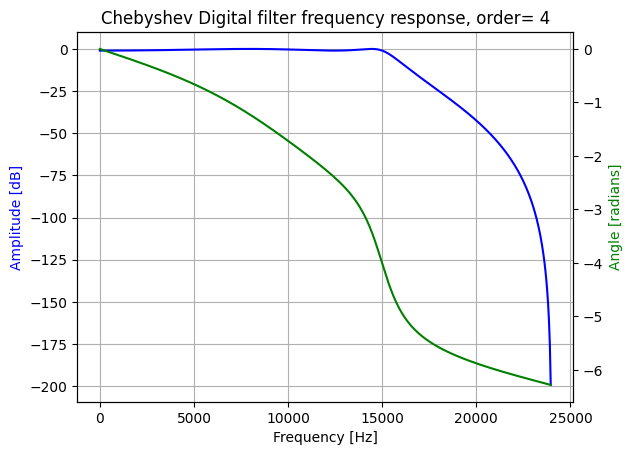

In [ ]:
from scipy.signal import cheby1
from scipy.signal import freqz_zpk

N = 4 # orden del filtro
Wn = 15000
ripple = 1 # Se escoge un rizado bajo para evitar comprometer la calidad de la señal
filt = 'lowpass'
out = 'zpk'

zeros, poles, gain = cheby1(N,rp=ripple,Wn=Wn,btype= filt,output=out,fs=Fs)
b,a        =         cheby1(N,rp=ripple,Wn=Wn,btype= filt,output='ba',fs=Fs)

w, h = freqz_zpk(zeros,poles,gain,fs=Fs)

def plot_freq_response(filter_name, w, h, N): #Mostrar la respuesta en frecuencia del filtro
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 1, 1)
  ax1.set_title(filter_name +' Digital filter frequency response, order= ' + str(N))
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')
  ax1.set_ylabel('Amplitude [dB]', color='b')
  ax1.set_xlabel('Frequency [Hz]')
  ax1.grid()
  ax2 = ax1.twinx()
  angles = np.unwrap(np.angle(h))
  ax2.plot(w, angles, 'g')
  ax2.set_ylabel('Angle [radians]', color='g')
  plt.axis('tight')
  plt.show() 

plot_freq_response('Chebyshev',w,h,N)

In [ ]:
from matplotlib.patches import Circle
def show_zp(z, p, title= 'Z-plane'): # Mostrar la ubicación de los polos y los zeros
  ax = plt.gca()
    
  ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms = 10)
  ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms = 10)
  unit_circle = Circle((0,0), radius=1, fill=False,
                        color='black', ls='solid', alpha=0.9)
  ax.add_patch(unit_circle)
  ax.axvline(0, color='0.7')
  ax.axhline(0, color='0.7')
    
  plt.title(title)
  plt.xlabel(r'Re{$z$}')
  plt.ylabel(r'Im{$z$}')
  plt.axis('equal')
  plt.xlim((-2, 2))
  plt.ylim((-2, 2))
  plt.grid()

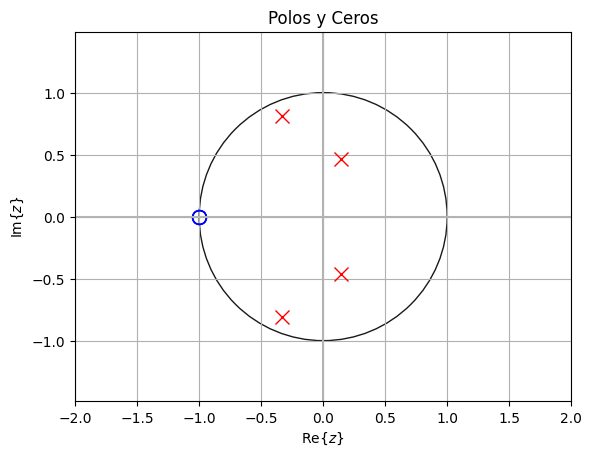

In [ ]:
show_zp(zeros, poles, title='Polos y Ceros')

De una vez escalamos la señal filtrada

In [ ]:
from scipy.signal import filtfilt

xf = (2/A1)*filtfilt(b,a,Mezclada)

Text(0.5, 1.0, 'Espectro de salida')

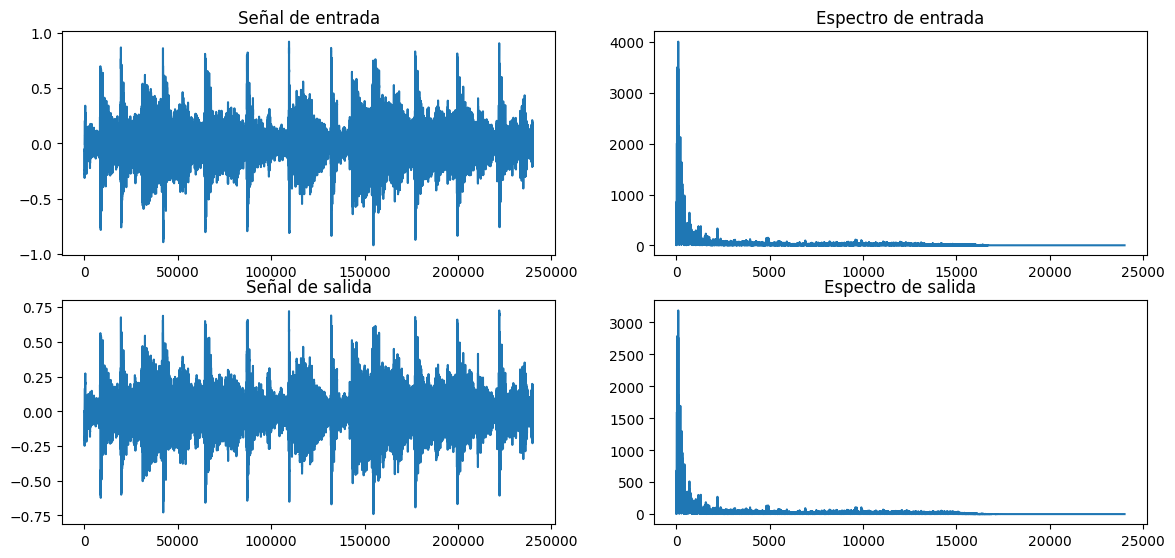

In [ ]:
# Calculamos espectro de la salida
Xfm = np.fft.rfft(m)
Xfxf = np.fft.rfft(xf)

fig, axs = plt.subplots(2,2)

fig.set_figheight(6.4)
fig.set_figwidth(14)

axs[0][0].plot(m)
axs[0][0].set_title("Señal de entrada")
axs[0][1].plot(vfre,abs(Xfm))
axs[0][1].set_title("Espectro de entrada")
axs[1][0].plot(xf)
axs[1][0].set_title("Señal de salida")
axs[1][1].plot(vfre,abs(Xfxf))
axs[1][1].set_title("Espectro de salida")

audio de salida

Para finalizar, es immportante notar que la amplitud de salida es menor que la de entrada, este efecto está dado por las pérdidas del filtro, esto se puede demostrar asignando cualquier valor arbitrario a A1, variable definida al principio del desarrollo de este punto, y observando que la señal de salida será exactamente igual sin importar el A1 (siempre que sea diferente de 0)

In [ ]:
Audio(xf,rate=Fs)